In [2]:
import pandas as pd 
import folium
from folium.plugins import HeatMap, HeatMapWithTime
from IPython import display

In [3]:
df = pd.read_csv('/Users/Reagan/Downloads/data.csv')
plot_data = df[["latitude", "longitude", "price", "craigslist"]]
plot_data = plot_data.dropna()

# Heatmap

In [28]:
hmap = folium.Map(location=[36.7,-119.4], zoom_start=11)
heat_data = [[row['latitude'],row['longitude']] for index, row in plot_data.iterrows()]
HeatMap(heat_data).add_to(hmap)

hmap

In [78]:
hmap.save('heatmap.html')


# CircleMarker

In [85]:
CA_COORDINATES = (36.7,-119.4)
colordict = {"losangeles": 'lightblue', 
             "sacramento": 'lightgreen', 
             "sandiego": 'orange', 
             "sfbay_eby": 'red',
            "sfbay_nby": 'yellow',
            "sfbay_sby":'blue',
            "sfbay_sfc":'pink',
            "sfbay_pen":'purple'}
# create empty map zoomed in on San Francisco
m = folium.Map(location=CA_COORDINATES, zoom_start=5)
 
# add a marker for every record in the filtered data, use a clustered view
plot_data1 = plot_data
for i in range(0,len(plot_data)):
    folium.CircleMarker([plot_data.iloc[i]['latitude'], plot_data.iloc[i]['longitude']],
                        color='b',
                        radius=.005*plot_data.iloc[i]['price'],
                        #key_on = plot_data.iloc[i]['price'],
                        legend_name='region',
                       fill_color=colordict[plot_data.iloc[i]['craigslist']],
                       fill=True).add_to(m)

In [86]:
m.save('circlemarker.html')

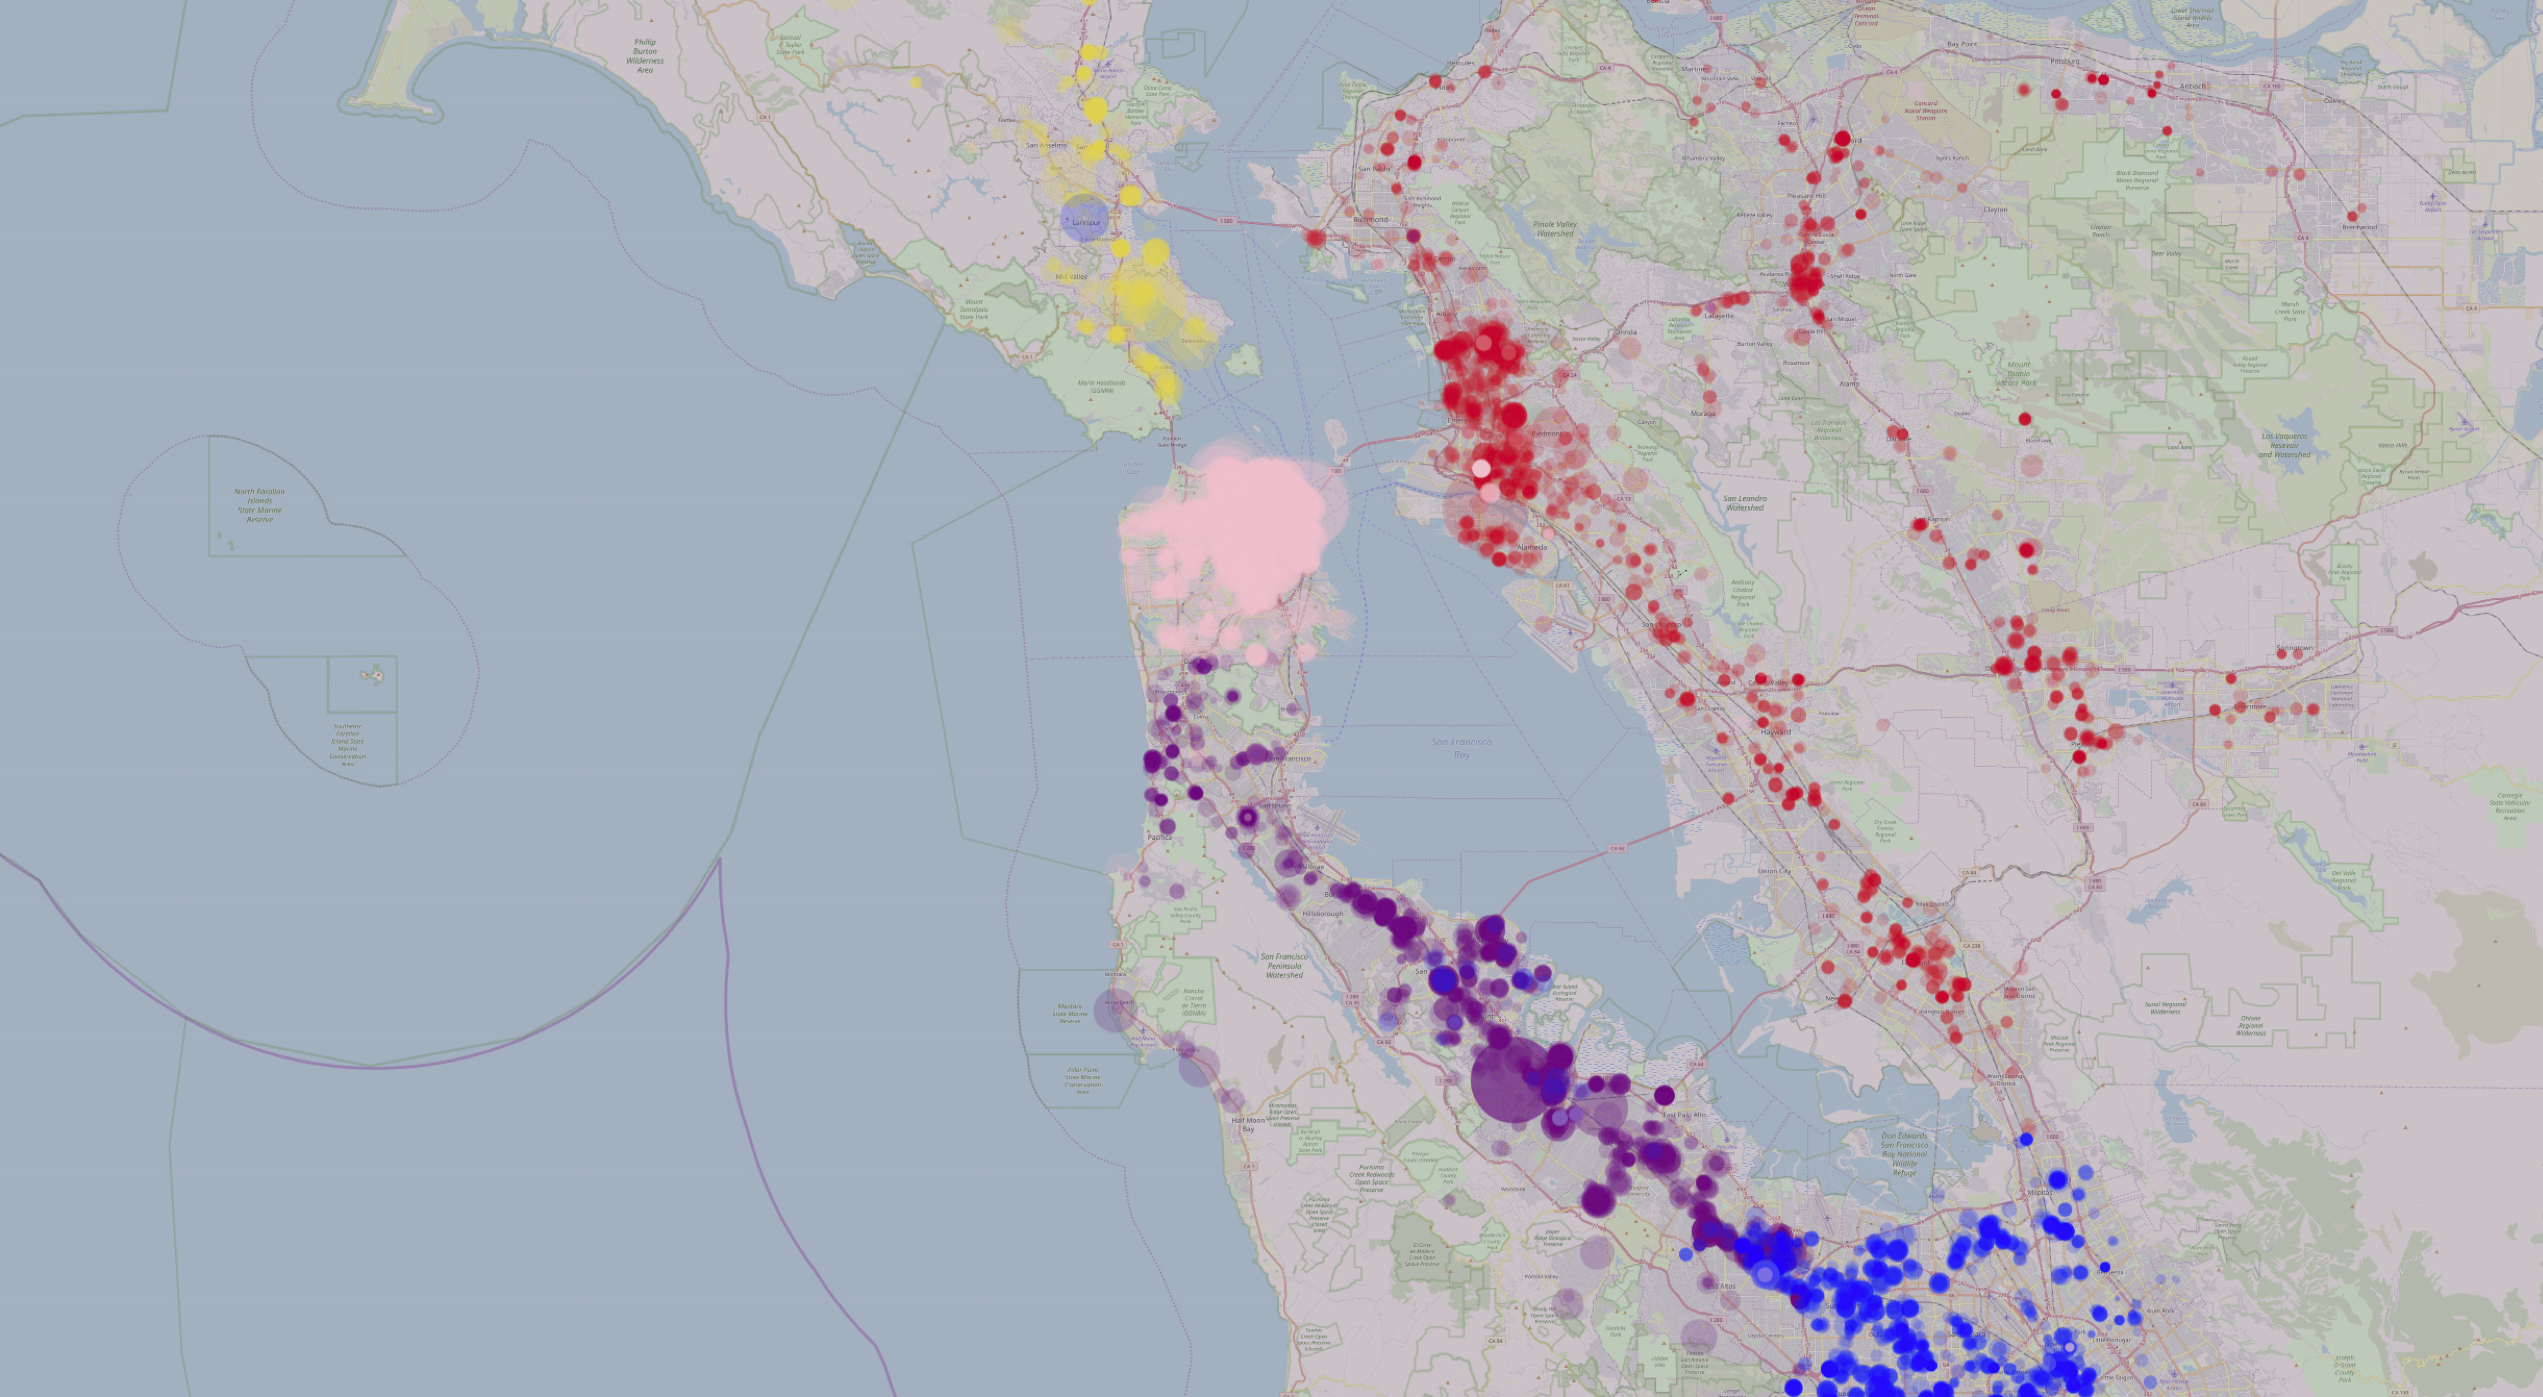

In [88]:
# show the static picture (this html is too large to display here)
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="/Users/Reagan/Desktop/hw2.jpg")